**Level 2**

**I Import my Libraries That i will use for the Project**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import geopandas as gpd
import folium

In [6]:
df = pd.read_csv(r'/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Task 1**

**Task: Table Booking and Online Delivery**

**Determine the percetage of restaurants that offer table booking and online delivery.**

In [7]:
total_restaurants = len(df)
restaurants_with_both = len(df[(df['Has Table booking'] == 'Ýes') & (df['Has Online delivery'] == 'Yes')])
percentage = (restaurants_with_both / total_restaurants) * 100

print(f"The percentage of restaurants offering both table booking and online delivery is: {percentage:.2f}%")

The percentage of restaurants offering both table booking and online delivery is: 0.00%


**Compare the average ratings of restaurants with table booking and those without.**

In [8]:
avg_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating of restaurants with table booking: {avg_rating_with_booking:.2f}")
print(f"Average rating of restaurants without table booking: {avg_rating_without_booking:.2f}")

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


**Analyze the availability of online delivery among restaurants with different price ranges.**

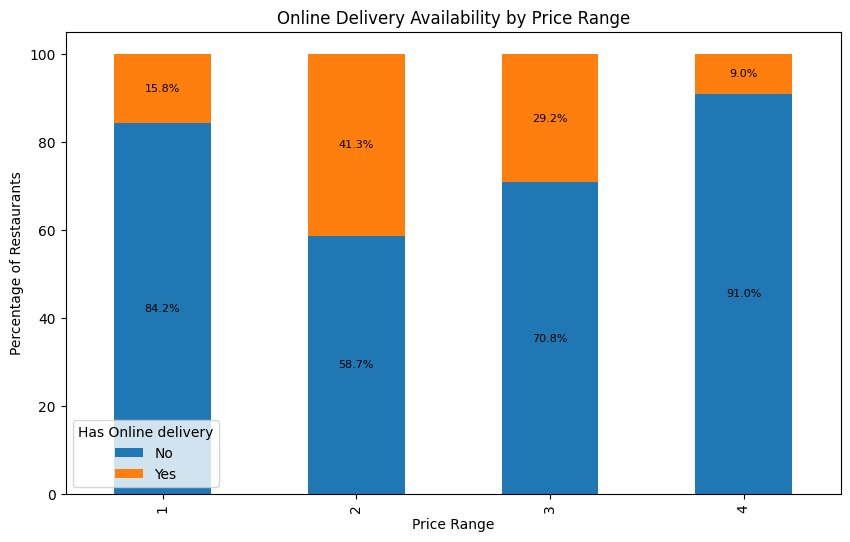

In [9]:
import pandas as pd
import matplotlib.pyplot as plt



price_range_delivery = df.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)


price_range_delivery_percentage = price_range_delivery.div(price_range_delivery.sum(axis=1), axis=0) * 100


price_range_delivery_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')


for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.text(x + width/2, y + height/2, '{:.1f}%'.format(height),
             ha='center', va='center', fontsize=8)

plt.show()

**Task 2**

**Task: Price Range Analysis**

**Determine the most common price range among all the restaurants.**

In [10]:
import pandas as pd
df = pd.read_csv(r'/content/Dataset .csv')
most_common_price_range = df['Price range'].mode()[0]
print(f"The most common price range among restaurants is: {most_common_price_range}")

The most common price range among restaurants is: 1


**Calculate the average rating for each price range.**

In [11]:
average_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
average_rating_by_price

,Aggregate rating
Price range,
1,1.999887
2,2.941054
3,3.683381
4,3.817918


**Identify the color that represents the highest average rating among different price ranges.**

In [17]:
highest_rated_price_range = average_rating_by_price.idxmax()

color_mapping = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow'
}

try:
    color_of_highest_rated = color_mapping[highest_rated_price_range]
    print(f"The price range with the highest average rating is: {highest_rated_price_range}")
    print(f"The color representing this price range is: {color_of_highest_rated}")
except KeyError:
    print(f"Price range {highest_rated_price_range} not found in the color mapping.")


The price range with the highest average rating is: 4
The color representing this price range is: yellow


**Task 3**

**Task: Feature Engineering**

**Extract additional features from the existing columns,such as the length of the restaurant name or address.**

In [15]:
df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
df['Address Length'] = df['Address'].str.len()

print(df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())

          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


**Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.**

In [16]:
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

print(df[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())

  Has Table booking  Has Table Booking Has Online delivery  \
0               Yes                  1                  No   
1               Yes                  1                  No   
2               Yes                  1                  No   
3                No                  0                  No   
4               Yes                  1                  No   

   Has Online Delivery  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
